# Chapter 25 处理多个模型
* 通过实例演示如何使用多个简单模型来更好地理解复杂数据集。
* 介绍如何使用列表列在数据框中保存任意数据结构。

## 25.1 gapminder
gapminder数据研究了各国随着时间的推移预期寿命和GDP等统计数据的变化。

我们将只关注该数据其中三个变量，探究这个问题：“每个国家（country)的预期寿命(lifeExp)随时间(year)如何变化？”。我们用多个简单模型来识别信号，这样我们就可能可以看到微妙的信号区别。我们还将了解模型如何帮助找出异常值和不寻常的趋势。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
gapminder = pd.read_csv(r'gapminder.csv')
gapminder.head(5)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


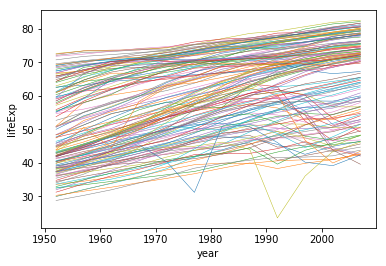

In [19]:
gapminder_g = gapminder.pivot_table(index=['continent','country'],columns='year',values='lifeExp')
k = []  
for i in range(len(gapminder_g)):   
    k.append(gapminder_g.iloc[i,:])
    
k = pd.DataFrame(k)
k.apply(lambda x: plt.plot(x, lw=0.5), axis = 1)
plt.xlabel('year')
plt.ylabel('lifeExp')
plt.show()

总的来说，预期寿命似乎在稳步提高。 然而，如果仔细观察，我们可能会注意到一些国家不遵循这种模式。我们如何使这些国家更容易看到（找到微妙的信号差异）？

我们将通过拟合一个线性趋势的模型来区分这些因素。该模型捕捉了随着时间的推移的稳定增长的部分，残差就是剩下的部分。

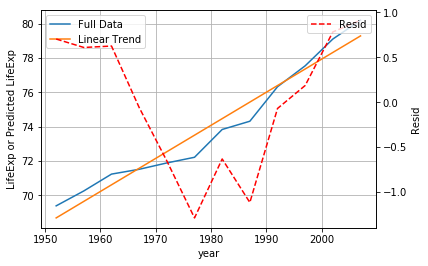

In [3]:
def draw_figure1(gapminder_g, continent, country):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(gapminder_g.loc[(continent, country),:], label='Full Data')
    poly = np.polyfit(list(gapminder_g.loc[(continent, country),:].index),list(gapminder_g.loc[(continent, country),:]), 1)
    polyval = np.polyval(poly, list(gapminder_g.loc[(continent, country),:].index))
    ax.plot(list(gapminder_g.loc[(continent, country),:].index), polyval, label='Linear Trend')
    ax2 = ax.twinx()
    ax2.plot(list(gapminder_g.loc[(continent, country),:].index), list(gapminder_g.loc[(continent, country),:])-polyval,'--r', label = 'Resid')
    ax.legend(loc=0)
    ax.grid()
    ax.set_xlabel("year")
    ax.set_ylabel("LifeExp or Predicted LifeExp")
    ax2.set_ylabel("Resid")
    ax2.legend(loc=1)
    plt.show()
    return

draw_figure1(gapminder_g, 'Oceania', 'New Zealand')

我们怎样才能很容易地将这种模型应用到每个国家？为每个国家的数据重复一个动作，我们需要一个新的数据结构：嵌套数据框架。
> gapminder_g = gapminder.pivot_table(index=['continent','country'],columns='year',values='lifeExp')    
> k = []  
> for i in range(len(gapminder_g)):   
> &emsp; k.append(gapminder_g.iloc[i,:])

这样我们可以得到：

In [8]:
print(k)

[year
1952    43.077
1957    45.685
1962    48.303
1967    51.407
1972    54.518
1977    58.014
1982    61.368
1987    65.799
1992    67.744
1997    69.152
2002    70.994
2007    72.301
Name: (Africa, Algeria), dtype: float64, year
1952    30.015
1957    31.999
1962    34.000
1967    35.985
1972    37.928
1977    39.483
1982    39.942
1987    39.906
1992    40.647
1997    40.963
2002    41.003
2007    42.731
Name: (Africa, Angola), dtype: float64, year
1952    38.223
1957    40.358
1962    42.618
1967    44.885
1972    47.014
1977    49.190
1982    50.904
1987    52.337
1992    53.919
1997    54.777
2002    54.406
2007    56.728
Name: (Africa, Benin), dtype: float64, year
1952    47.622
1957    49.618
1962    51.520
1967    53.298
1972    56.024
1977    59.319
1982    61.484
1987    63.622
1992    62.745
1997    52.556
2002    46.634
2007    50.728
Name: (Africa, Botswana), dtype: float64, year
1952    31.975
1957    34.906
1962    37.814
1967    40.697
1972    43.591
1977    46.137
19

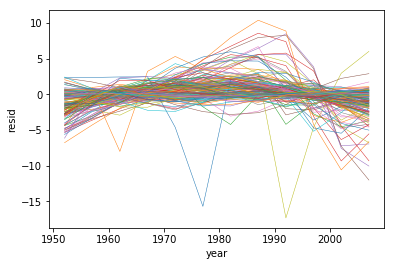

In [4]:
def draw_figure2(gapminder_g):
    for i in range(len(gapminder_g)):   
        poly = np.polyfit(list(gapminder_g.iloc[i,:].index),list(gapminder_g.iloc[i,:]), 1)
        polyval = np.polyval(poly, list(gapminder_g.iloc[i,:].index))
        plt.plot(list(gapminder_g.iloc[i,:].index), list(gapminder_g.iloc[i,:])-polyval, lw = 0.5, label = 'Resid')
    plt.xlabel('year')
    plt.ylabel('resid')
    plt.show()
    return

draw_figure2(gapminder_g)

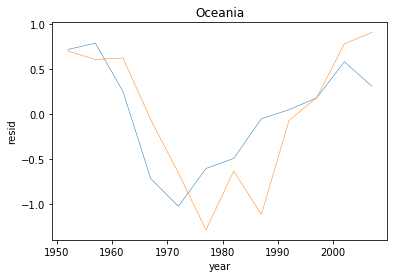

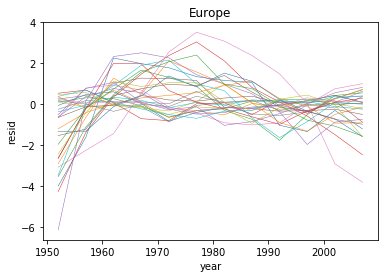

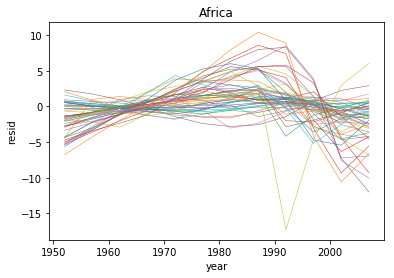

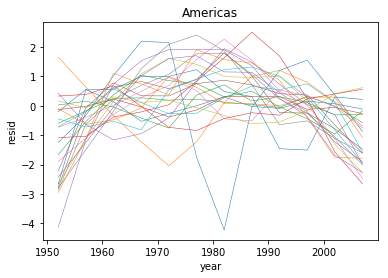

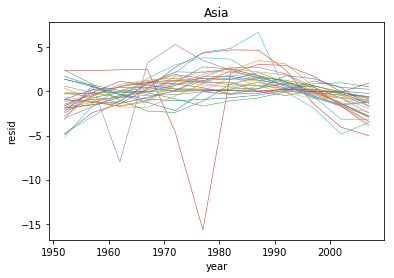

In [5]:
def draw_figure3(gapminder_g, continent):
    gapminder_g = gapminder_g.reset_index()
    temp = gapminder_g[gapminder_g['continent'] == continent]
    for i in range(len(temp)):   
        poly = np.polyfit(list(temp.iloc[i,2:].index),list(temp.iloc[i,2:]), 1)
        polyval = np.polyval(poly, list(temp.iloc[i,2:].index))
        plt.plot(list(temp.iloc[i,2:].index), list(temp.iloc[i,2:])-polyval, lw = 0.5, label = 'Resid')
    plt.xlabel('year')
    plt.ylabel('resid')
    plt.title(continent)
    plt.show(continent)
    return

draw_figure3(gapminder_g, 'Oceania')
draw_figure3(gapminder_g, 'Europe')
draw_figure3(gapminder_g, 'Africa')
draw_figure3(gapminder_g, 'Americas')
draw_figure3(gapminder_g, 'Asia')

在非洲国家，我们看到非常大的残差序列，这表明我们的模型并不太合适。

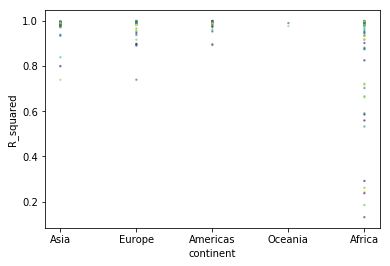

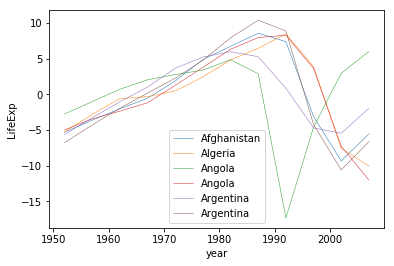

In [6]:
def draw_figure4_5(gapminder_g):
    rsquared = pd.DataFrame(index = gapminder_g.index, columns = ['R_squared', 'x'])
    for i in range(len(gapminder_g)):   
        poly = np.polyfit(list(gapminder_g.iloc[i,:].index),list(gapminder_g.iloc[i,:]), 1)
        polyval = np.polyval(poly, list(gapminder_g.iloc[i,:].index))
        rsquared.iloc[i,0] = np.corrcoef(list(gapminder_g.iloc[i,:]), polyval)[0,1]
    rsquared = rsquared.reset_index()
    temp1 = list(set(rsquared.continent))
    k = 0
    for i in temp1:
        k=k+1
        rsquared.iloc[rsquared.index[rsquared['continent'] == i], 3] = k
    plt.scatter(rsquared['x'], rsquared['R_squared'], s = 2, c=np.random.rand(len(rsquared)),alpha=0.5)
    plt.xticks([1,2,3,4,5],temp1)
    plt.xlabel('continent')
    plt.ylabel('R_squared')
    plt.show()
    temp = rsquared[rsquared['R_squared']<0.3].index
    for i in temp:   
        poly = np.polyfit(list(gapminder_g.iloc[i,:].index),list(gapminder_g.iloc[i,:]), 1)
        polyval = np.polyval(poly, list(gapminder_g.iloc[i,:].index))
        plt.plot(list(gapminder_g.iloc[i,:].index), list(gapminder_g.iloc[i,:])-polyval, lw = 0.5, label = gapminder['country'][i])
    plt.xlabel('year')
    plt.ylabel('LifeExp')
    plt.legend()
    plt.show()
    return

draw_figure4_5(gapminder_g)

## 25.2 列表列
列表列是定义在数据框中的一种数据类型。它以列表为元素，并作为数据框的一列。

列表列作为一种中间数据结构，最大用处是方便对我们数据进行处理和分析。 
### 25.2.1 新建列表列

> data = []  
> for i in range(len(file)):   
> &emsp; data.append(pd.read_csv(file[i],header=0,index_col=0))

In [10]:
pd.DataFrame({'x':[[1,2,3],[4,5,6]], 'y':['1,2','3,4,5']})

,x,y
0,"[1, 2, 3]","1,2"
1,"[4, 5, 6]","3,4,5"


### 25.2.2 嵌套还原

In [26]:
x1 = "a,b,c"
x2 = "d,e,f,g"

data = pd.DataFrame({'x1':[x1, x2], 'x2':[x1.split(','), x2.split(',')]})
data

,x1,x2
0,"a,b,c","[a, b, c]"
1,"d,e,f,g","[d, e, f, g]"


In [27]:
data0 = pd.DataFrame(columns = ['x1','x2'])
for x in range(len(data)):
    for y in range(len(data['x2'][x])):
        data0 = data0.append({'x1':data['x1'][x],'x2':data['x2'][x][y]}, ignore_index=True)

In [28]:
data0

,x1,x2
0,"a,b,c",a
1,"a,b,c",b
2,"a,b,c",c
3,"d,e,f,g",d
4,"d,e,f,g",e
5,"d,e,f,g",f
6,"d,e,f,g",g
